<a href="https://colab.research.google.com/github/sgsakthiganesh/GENAI_LAB_PROJECT/blob/main/Monkeypox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Monkey Pox classification using Visuals and Transfer Learning

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf

train_data="/content/drive/MyDrive/monkeypox/Test"
test_data="/content/drive/MyDrive/monkeypox/Train"
val_data="/content/drive/MyDrive/monkeypox/Val"
aug_data="/content/drive/MyDrive/monkeypox/Augmented Images"


Exception ignored in: <function _xla_gc_callback at 0x7fcefb8df0a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


In [6]:
import tensorflow as tf

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

# Load original dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)




Found 45 files belonging to 2 classes.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_data,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

aug_ds = tf.keras.preprocessing.image_dataset_from_directory(
    aug_data,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="binary"
)

Found 420 files belonging to 2 classes.
Found 2142 files belonging to 2 classes.
Found 3202 files belonging to 2 classes.


In [8]:
# Combine original and augmented training datasets
full_train_ds = train_ds.concatenate(aug_ds)

# Optional: Shuffle and prefetch for efficiency
full_train_ds = full_train_ds.shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


In [9]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Freeze the base model

# Add custom layers for binary classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Reduce feature maps to a single vector
    layers.Dropout(0.4),              # Regularization
    layers.Dense(1, activation="sigmoid")  # Binary classification output
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    full_train_ds,  # Ensure train_gen has scalar labels (class_mode='binary')
    validation_data=val_ds,
    epochs=10
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,804,833 (83.18 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 259s 966ms/step - accuracy: 0.6003 - loss: 6.9133 - val_accuracy: 0.7762 - val_loss: 1.8148
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.6403 - loss: 3.4160 - val_accuracy: 0.7357 - val_loss: 1.0413
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6394 - loss: 2.4094 - val_accuracy: 0.7714 - val_loss: 1.2470
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.6445 - loss: 2.0560 - val_accuracy: 0.7143 - val_loss: 0.8540
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.6748 - loss: 1.7289 - val_accuracy: 0.7738 - val_loss: 1.1444
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6515 - loss: 1.7780 - val_accuracy: 0.7643 - val_loss: 0.7949
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6626 - loss: 1.5759 - val_accuracy: 0.7571 - val_loss: 2.6591
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.6612 - loss: 1.8663 

In [10]:
# Unfreeze the base model
base_model.trainable = True

# Re-compile with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Fine-tune the model
history_finetune = model.fit(
    full_train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 199s 573ms/step - accuracy: 0.6237 - loss: 0.6446 - val_accuracy: 0.8452 - val_loss: 0.3852
Epoch 2/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 35s 131ms/step - accuracy: 0.8443 - loss: 0.3907 - val_accuracy: 0.9333 - val_loss: 0.2246
Epoch 3/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - accuracy: 0.9193 - loss: 0.2342 - val_accuracy: 0.9524 - val_loss: 0.1485
Epoch 4/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 35s 129ms/step - accuracy: 0.9484 - loss: 0.1575 - val_accuracy: 0.9643 - val_loss: 0.0961
Epoch 5/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.9601 - loss: 0.1187 - val_accuracy: 0.9738 - val_loss: 0.0702
Epoch 6/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9747 - loss: 0.0854 - val_accuracy: 0.9738 - val_loss: 0.0571
Epoch 7/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.9729 - loss: 0.0780 - val_accuracy: 0.9857 - val_loss: 0.0428
Epoch 8/10
204/204 ━━━━━━━━━━━━━━━━━━━━ 35s 131ms/step - accuracy: 0.9823 - loss: 

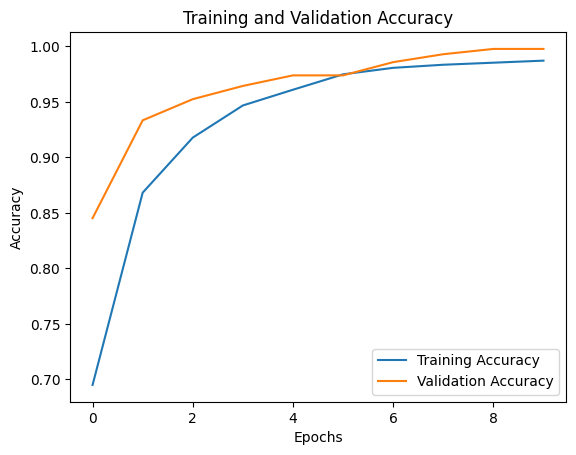

In [11]:
import matplotlib.pyplot as plt

plt.plot(history_finetune.history['accuracy'], label='Training Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [13]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


134/134 ━━━━━━━━━━━━━━━━━━━━ 743s 6s/step - accuracy: 0.9757 - loss: 0.0566
Test Accuracy: 97.95%


In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the image
image_path = "/content/images.jpeg"
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image)
image_array = image_array / 255.0
image_array = np.expand_dims(image_array, axis=0)


In [18]:
# Make a prediction
prediction = model.predict(image_array)

# Binary classification (0 or 1) using a threshold
predicted_class = (prediction > 0.5).astype("int32")

# Assuming train_ds was created using image_dataset_from_directory
class_names = train_ds.class_names  # List of class names (e.g., ['monkeypox', 'other_diseases'])

# Map the predicted class index to its label
predicted_class_index = predicted_class[0][0]  # Get the predicted class index (0 or 1)
predicted_label = class_names[predicted_class_index]  # Get the class name

print(f"Predicted Class: {predicted_label}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Class: Others


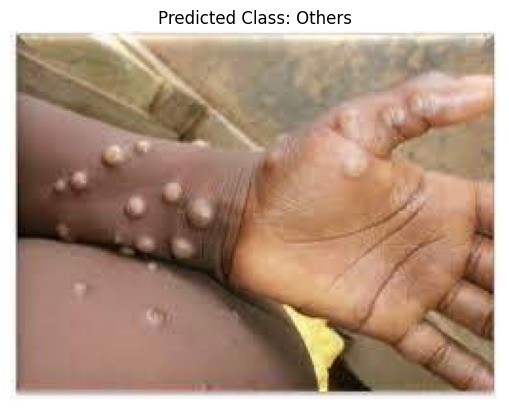

In [19]:
import matplotlib.pyplot as plt
plt.imshow(load_img(image_path))
plt.title(f"Predicted Class: {predicted_label}")
plt.axis("off")
plt.show()
